In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# import glob

# file_name = "listing_fix-row588.csv"  # Replace with your actual file name
# file_paths = glob.glob(f"/content/drive/My Drive/**/{file_name}", recursive=True)

# if file_paths:
#     print("File found at:", file_paths[0])
# else:
#     print("File not found")

In [10]:

file_name = '/content/drive/My Drive/Colab Notebooks/Project/Airbnb listing dataset/listing_fix-row588.csv'
df = pd.read_csv(file_name)

In [11]:
df.columns = df.columns.str.strip()
# Remove leading/trailing spaces from column names

In [12]:
# We replace missing values with the median of each column.
# Identify numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Fill missing numerical values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# We replace missing values with the most frequent (mode) value.
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing categorical values with mode
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [13]:
# Some columns (like 'Amenities' and 'Description') contain lists stored as strings. We convert them back into Python lists.

import ast  # To safely evaluate string to list

def convert_to_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return []

# Convert 'Amenities' and 'Description' columns
df['Amenities'] = df['Amenities'].apply(convert_to_list)
df['Description'] = df['Description'].apply(convert_to_list)

In [14]:
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
# To avoid errors, we make sure that numerical columns are properly formatted as numbers.

In [15]:
# Since 'Amenities' and 'Description' columns contain lists, they are unhashable, so we convert them to strings before removing duplicates.

# Convert 'Amenities' and 'Description' to strings for deduplication
df['Amenities'] = df['Amenities'].astype(str)
df['Description'] = df['Description'].astype(str)

# Remove duplicate rows
df = df.drop_duplicates()

In [16]:
# Some text columns might contain unwanted special characters like \n (newlines). We remove them.

# Remove newline characters and extra spaces from 'Title' and 'Category'
df['Title'] = df['Title'].str.replace(r'\n', ' ', regex=True).str.strip()
df['Category'] = df['Category'].str.strip()


In [17]:
df.to_csv("cleaned_listing.csv", index=False)

In [18]:

# # Display basic information about the dataset
# df.info(), df.head()

In [19]:
# from google.colab import files
# files.download("cleaned_listing.csv")

In [20]:
# Summary statistics for numerical columns
summary_stats = df.describe()
summary_stats

,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,bedrooms
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,4.025304,2.504049,1.397773,161.314777,4.856984,4.902935,4.938866,4.903036,4.948887,4.767510,33.807692,1.689271
std,2.422113,1.868792,0.873843,212.119499,0.174173,0.128200,0.117762,0.115166,0.099689,0.172962,14.697196,1.110695
min,1.000000,1.000000,0.000000,8.000000,3.800000,4.000000,3.900000,4.000000,3.900000,3.300000,2.000000,1.000000
25%,2.000000,1.000000,1.000000,84.000000,4.800000,4.900000,4.900000,4.900000,4.900000,4.700000,23.000000,1.000000
50%,4.000000,2.000000,1.000000,120.000000,4.900000,4.900000,5.000000,4.900000,5.000000,4.800000,33.000000,1.000000
75%,5.000000,3.000000,1.500000,181.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,43.000000,2.000000
max,16.000000,17.000000,10.000000,5427.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,84.000000,10.000000


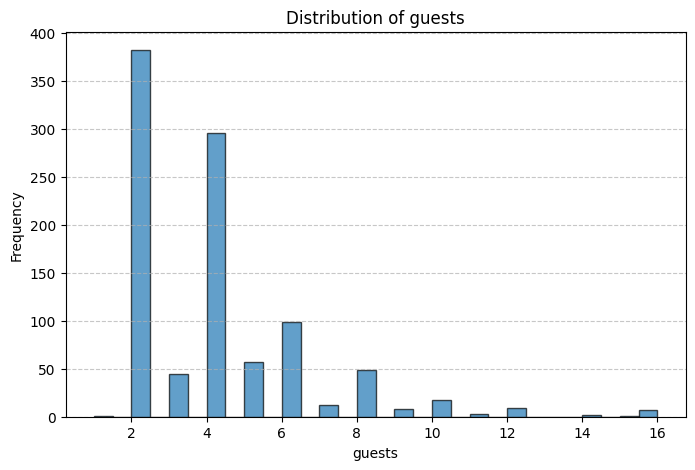

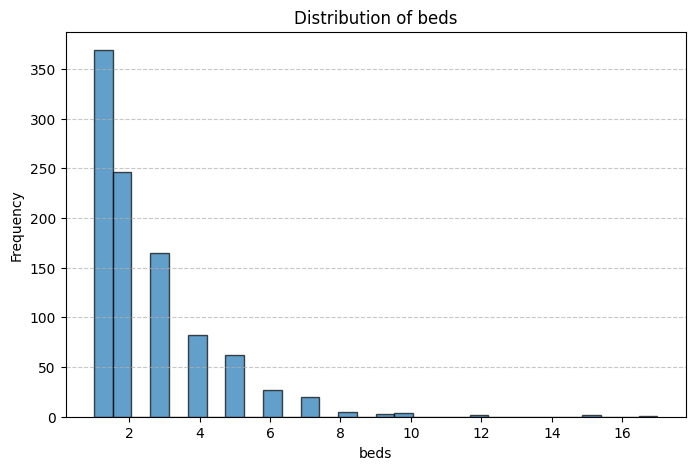

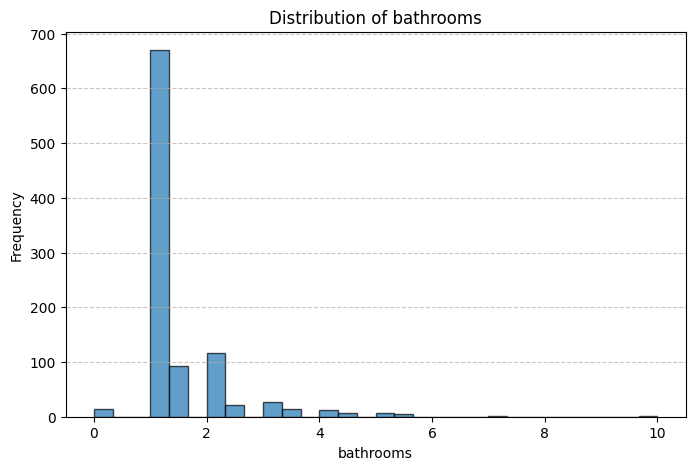

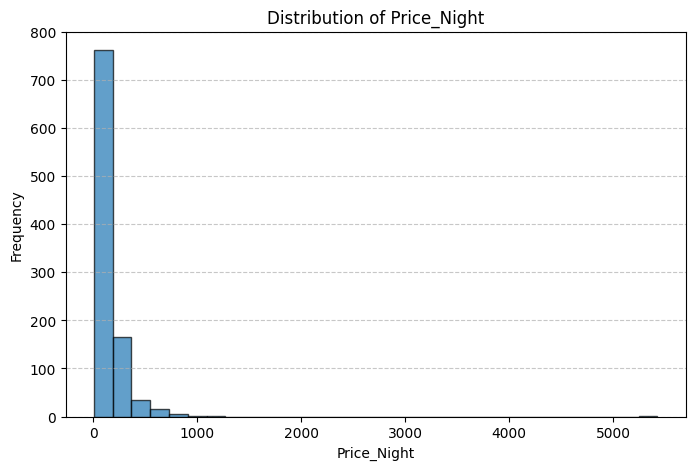

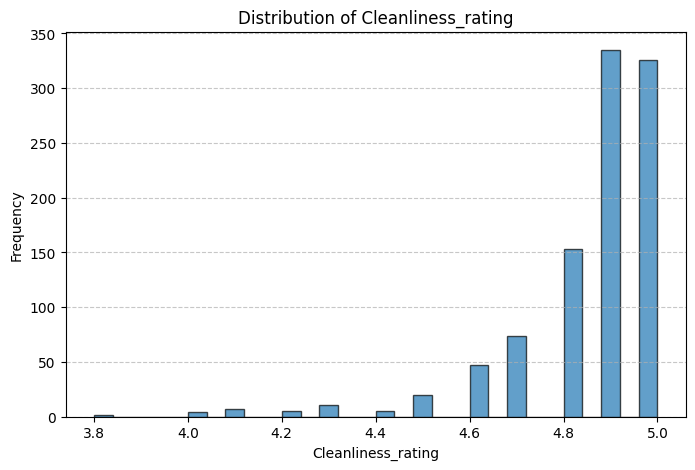

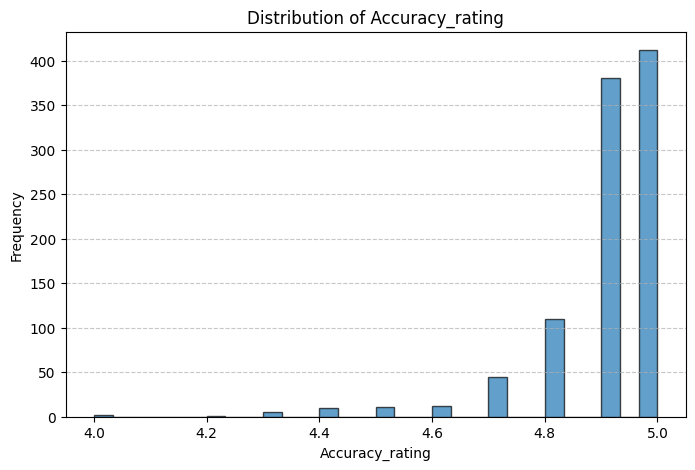

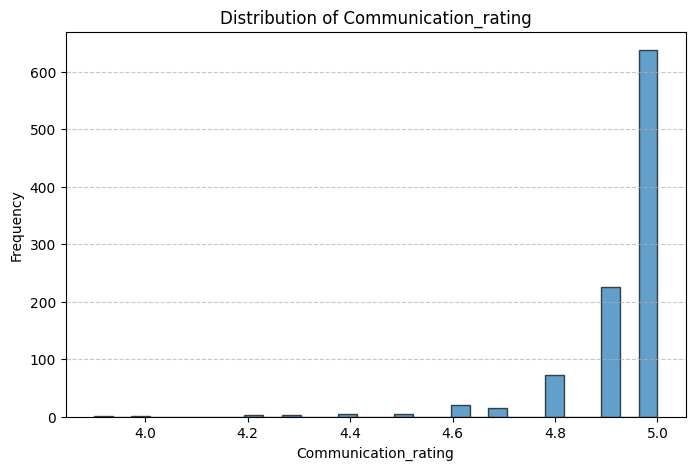

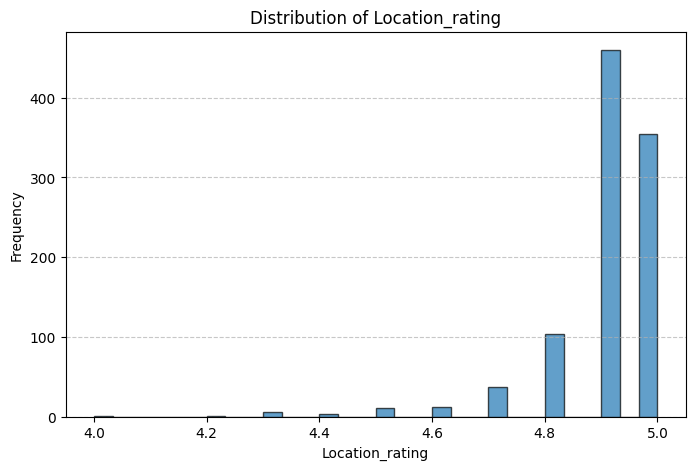

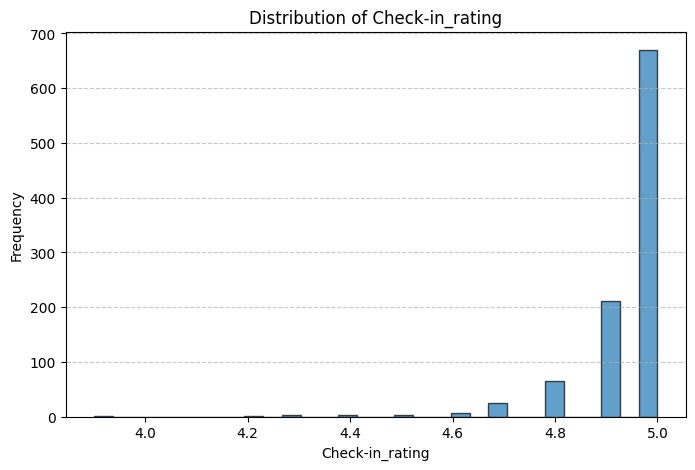

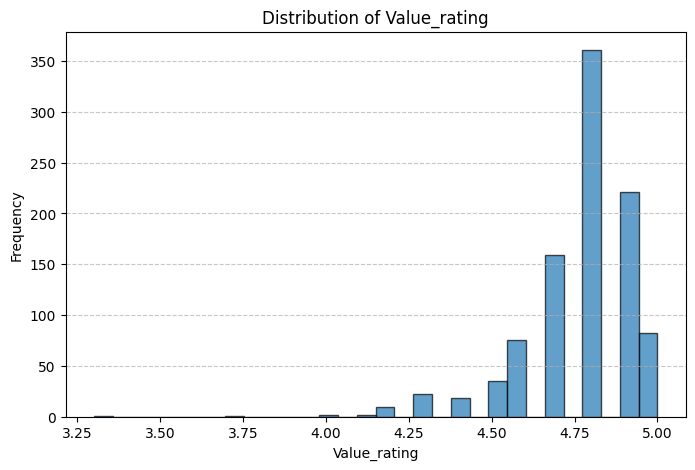

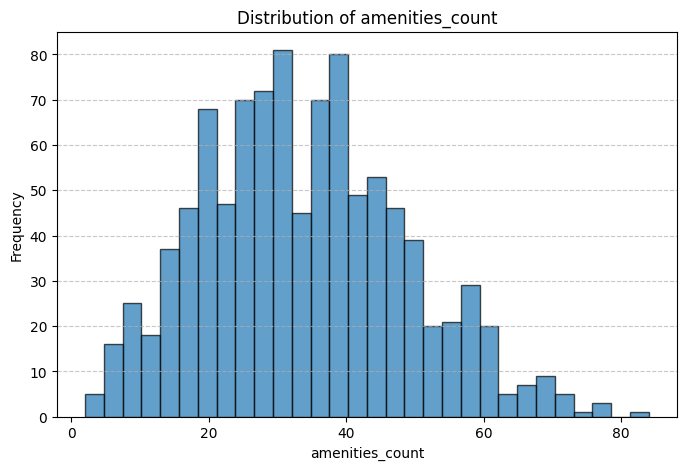

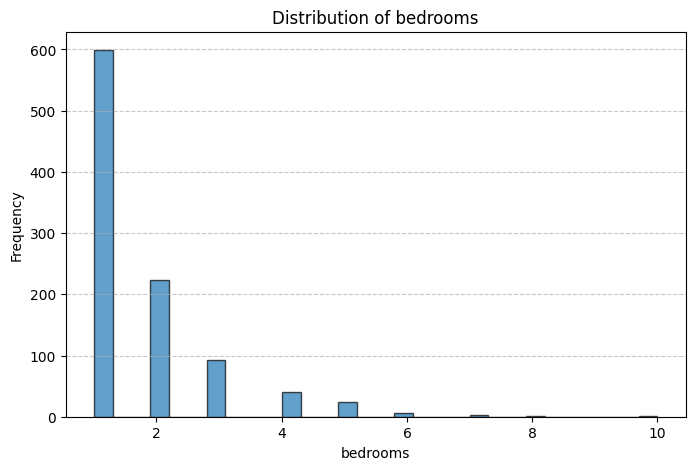

In [21]:
# List of numerical columns to visualize
numeric_cols = ['guests', 'beds', 'bathrooms', 'Price_Night', 'Cleanliness_rating',
                'Accuracy_rating', 'Communication_rating', 'Location_rating',
                'Check-in_rating', 'Value_rating', 'amenities_count', 'bedrooms']

# Creating histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [22]:
# Key Insights from Distributions:
# Price per Night:

# Highly right-skewed, meaning most listings are on the lower end of the price range, but a few are very expensive.

# Guests, Beds, and Bedrooms:

# Most listings accommodate 2–4 guests, with fewer options for larger groups.

# Beds and bedrooms follow a similar pattern, mostly 1–2 per listing

# Bathrooms:

# Most listings have 1 bathroom, but some have fractional values (likely indicating shared or half-bathrooms).

# Amenities:

# Wide range, with most listings offering 20–50 amenities.

# Ratings:

# Almost all ratings are skewed towards higher values (between 4.5 and 5.0), showing strong positive reviews.

# Next, I'll analyze categorical features, including the top categories and locations.

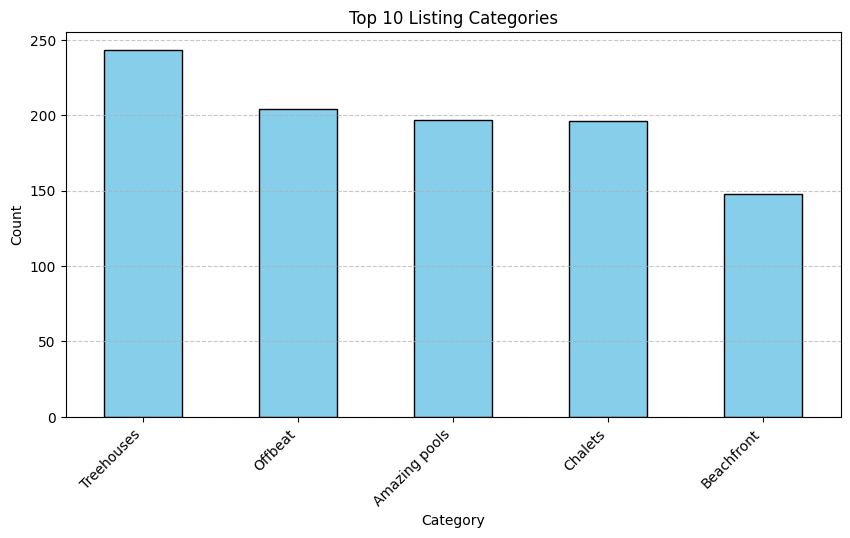

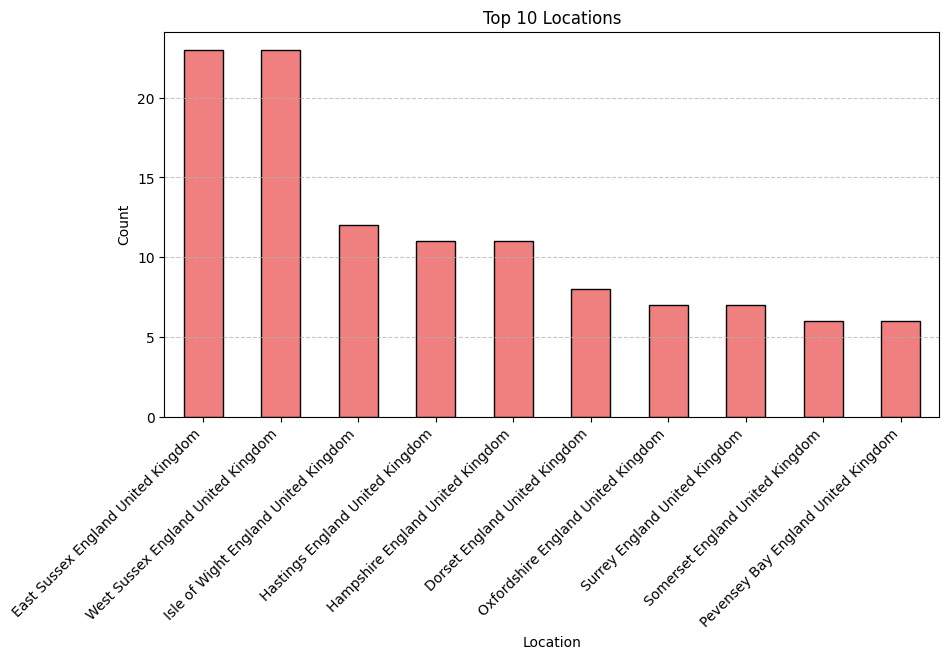

In [23]:
# Analyzing categorical columns: Category and Location
category_counts = df["Category"].value_counts()
location_counts = df["Location"].value_counts()

# Display top 10 categories and locations
top_categories = category_counts.head(10)
top_locations = location_counts.head(10)

# Plotting bar charts
plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Listing Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
top_locations.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:
# Insights from Categorical Analysis:
# Popular Listing Categories:

# The dataset consists of multiple accommodation types, with some categories being more common than others.

# Some categories dominate the listings, while others have fewer options.

# Top Locations:

# The dataset features listings from various places, with some locations appearing more frequently.

# Certain destinations have significantly higher representation.

In [25]:
# import seaborn as sns

# # Compute correlation matrix
# corr_matrix = df.corr()

# # Plot heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Matrix of Numerical Features")
# plt.show()


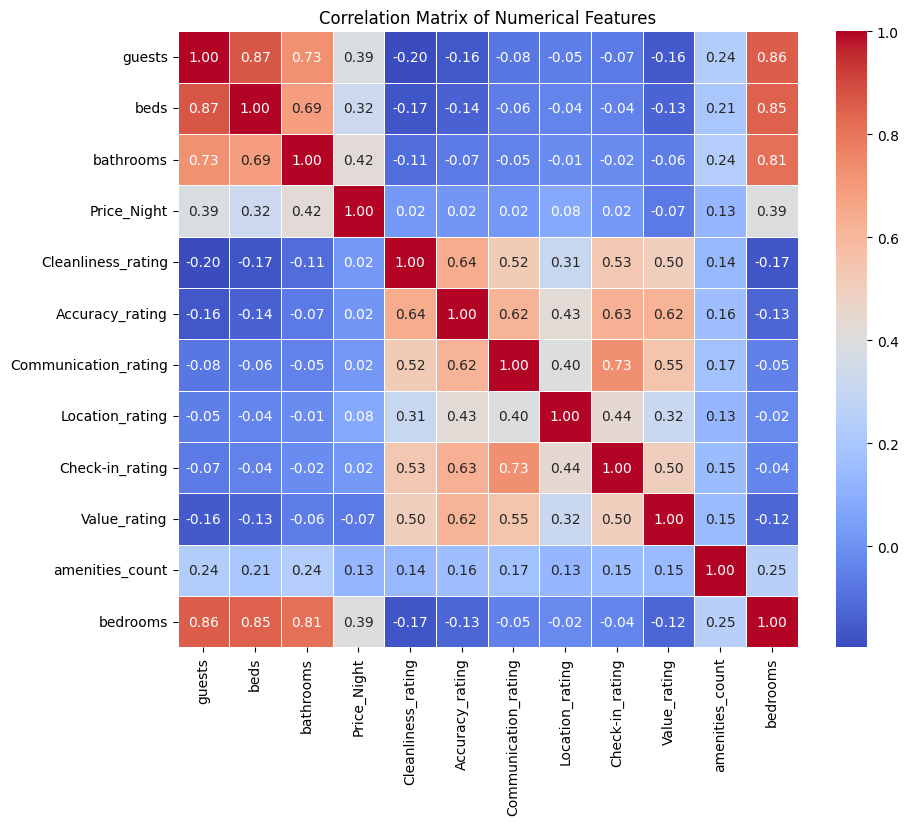

In [26]:

# Compute correlation matrix, excluding non-numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [27]:
# Interpreting Key Relationships:
# High Positive Correlations:

# guests & beds (0.87), guests & bedrooms (0.86), guests & bathrooms (0.73)
# → More guests typically means more beds, bedrooms, and bathrooms.
# beds & bedrooms (0.85), beds & bathrooms (0.69)
# → Logical: more beds usually require more bedrooms and facilities.
# bathrooms & bedrooms (0.81)
# → More bedrooms tend to be accompanied by more bathrooms.
# Accuracy_rating & Check-in_rating (0.73), Accuracy_rating & Cleanliness_rating (0.64)
# → Properties rated highly for accuracy tend to also receive high check-in and cleanliness ratings.


# Moderate Positive Correlations:
# Communication_rating & Check-in_rating (0.73)
# → Better communication tends to align with smoother check-in experiences.
# Cleanliness_rating & Value_rating (0.50)
# → Clean places are perceived as providing better value.
# Accuracy_rating & Communication_rating (0.62)
# → Suggests hosts that are clear and accurate tend to communicate well.


# Low/No Correlation:
# Price_Night has very low correlation with most rating features (e.g., 0.02 with Cleanliness_rating), suggesting:
# → Price doesn't strongly influence rating perceptions directly.
# amenities_count has generally low correlations with ratings too (max ~0.25), implying:
# → Just having more amenities doesn’t necessarily mean higher ratings.
# Weak Negative Correlations:
# guests, beds, bedrooms vs. most ratings have slightly negative correlations (e.g., guests vs. Cleanliness_rating: -0.20)
# → Larger listings might get slightly lower ratings, possibly due to being harder to maintain or manage.


# Summary:
# Size-related variables (guests, beds, bedrooms, bathrooms) are highly interrelated.
# Ratings are interrelated (especially accuracy, cleanliness, check-in).
# Price and amenities count don't strongly correlate with ratings or size.
# Larger accommodations may have slightly worse ratings, though the effect is small.


# Next do the model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cleaned_df = pd.read_csv('cleaned_listing.csv')

# Step 1: Select relevant features for prediction
features = [
    'guests', 'beds', 'bathrooms', 'bedrooms',
    'Cleanliness_rating', 'Accuracy_rating', 'Communication_rating',
    'Location_rating', 'Check-in_rating', 'Value_rating',
    'amenities_count', 'Location'
]
target = 'Price_Night'

# Drop rows with missing values in selected features
ml_df = cleaned_df[features + [target]].dropna()

# Separate features (X) and target (y)
X = ml_df.drop(columns=[target])
y = ml_df[target]

# Identify categorical and numeric columns
categorical_features = ['Location']
numeric_features = X.drop(columns=categorical_features).columns.tolist()

# Set up column transformer to handle encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric features as is
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,guests,beds,bathrooms,bedrooms,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,Location
866,6.0,4.0,2.0,3.0,4.9,5.0,5.0,5.0,5.0,4.8,29,East Sussex England United Kingdom
215,7.0,3.0,1.0,2.0,4.9,4.9,5.0,4.9,5.0,4.8,20,Pejibaye Provincia de Cartago Costa Rica
294,2.0,1.0,1.0,1.0,5.0,4.9,4.9,5.0,5.0,4.7,23,Southampton England United Kingdom
49,2.0,1.0,1.0,1.0,5.0,4.9,4.9,5.0,5.0,4.9,52,Appleton Maine United States
879,5.0,4.0,2.0,3.0,4.9,4.9,5.0,4.9,5.0,4.7,29,East Sussex England United Kingdom


In [29]:
# Great! We’ve successfully prepared the data for training. ✅

# Here’s what we’ve done so far:

# Selected relevant features (ratings, capacity, location, etc.).

# Cleaned missing values.

# Set up the data for machine learning, with both numeric and categorical features.

# Next Step: Train a Machine Learning Model
# Let’s now:

# Apply preprocessing (handle the location text).

# Train a simple Linear Regression model.

# Evaluate how well it predicts the price.



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2–3: Create a pipeline that preprocesses data then applies Linear Regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(86.28764383509689, 0.12520095651649787)

In [31]:
# 📊 Model Results: Linear Regression
# Mean Absolute Error (MAE): $86.29
# → On average, the predictions are off by about $86.

# R² Score: 0.13
# → Only about 13% of the variation in price is explained by the model.

# 💡 What This Means

# This basic model isn't very accurate, but it's a solid start for learning.

# Airbnb pricing can depend on many other factors we may not have included (like season, reviews, or pictures).

# Try a better model (like Random Forest)?

# Train a Random Forest model using the same features.

# Compare its performance to the Linear Regression model.


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Replace the linear regression in our pipeline with Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict using the Random Forest model
rf_y_pred = rf_pipeline.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mae, rf_r2

(80.82459595959595, 0.1037071457512494)

In [33]:
# 🌲 Random Forest Model Results
# Mean Absolute Error (MAE): $80.82
# → A bit better than Linear Regression’s $86.29.

# R² Score: 0.10
# → Slightly lower than Linear Regression’s 0.13, meaning it explains slightly less variation in the price.

# 📌 Interpretation
# MAE improved → Predictions are closer on average.

# R² slightly dropped → It may be overfitting a bit or not capturing the underlying patterns well.

# Excellent! 🌟 Gradient Boosting models—like GradientBoostingRegressor—often perform better than Random Forests on structured/tabular data because they build trees sequentially to correct previous errors.

# Let’s now:

# Train a Gradient Boosting Regressor.

# Evaluate its performance (MAE and R²).

# Compare with previous models.


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a pipeline with Gradient Boosting Regressor
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42, n_estimators=100))
])

# Train the Gradient Boosting model
gb_pipeline.fit(X_train, y_train)

# Predict using the Gradient Boosting model
gb_y_pred = gb_pipeline.predict(X_test)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

gb_mae, gb_r2

(81.35957863073058, 0.098622354657806)

In [35]:
# Gradient Boosting Model Results
# Mean Absolute Error (MAE): $81.36
# → Similar to Random Forest ($80.82) and better than Linear Regression.

# R² Score: 0.10
# → Again, similar to Random Forest and slightly lower than Linear Regression (0.13).

# 📊 Model Comparison Summary
# Model	MAE ($)	R² Score
# Linear Regression	86.29	0.13
# Random Forest	80.82	0.10
# Gradient Boosting	81.36	0.10

# ✅ Conclusion
# All three models perform similarly, but none are great yet. That’s likely because some important information is missing from the features.

# SO at the last feature >>Image<<

In [36]:
from google.colab import drive
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# STEP 1: Mount Google Drive
drive.mount('/content/drive')

# STEP 2: Set path to parent folder
base_path = '/content/drive/MyDrive/Colab Notebooks/Project/Airbnb listing dataset/images'  # Change this!

# STEP 3: Load pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# STEP 4: Feature extraction function
def extract_features(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x, verbose=0)
        return features.flatten()
    except Exception as e:
        print(f"❌ Error processing {img_path}: {e}")
        return None

# STEP 5: Loop over folders, average image features
listing_features = []
listing_ids = []

for listing_id in tqdm(os.listdir(base_path)):
    folder_path = os.path.join(base_path, listing_id)
    if os.path.isdir(folder_path):
        img_feats = []
        for file in os.listdir(folder_path):
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                feat = extract_features(os.path.join(folder_path, file))
                if feat is not None:
                    img_feats.append(feat)

        if img_feats:  # if we found valid images
            avg_feat = np.mean(img_feats, axis=0)
            listing_features.append(avg_feat)
            listing_ids.append(listing_id)

# STEP 6: Save to CSV
features_df = pd.DataFrame(listing_features)
features_df['ID'] = listing_ids
features_df.to_csv('/content/image_features.csv', index=False)

print("✅ Image features saved to image_features.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


100%|██████████| 942/942 [41:42<00:00,  2.66s/it]


✅ Image features saved to image_features.csv


In [37]:
import pandas as pd

# Step 1: Load your listing data and image features
listings_df = pd.read_csv('cleaned_listing.csv')
image_features_df = pd.read_csv('/content/image_features.csv')



# Step 2: Merge on ID (inner join ensures we keep only listings with images)
merged_df = pd.merge(listings_df, image_features_df, on='ID', how='inner')

# Step 3: Save merged dataset (optional)
merged_df.to_csv('/content/airbnb_with_image_features.csv', index=False)

print(f"✅ Merged {len(merged_df)} listings with image features!")


✅ Merged 942 listings with image features!


In [45]:
import shutil
shutil.copy('/content/airbnb_with_image_features.csv', '/content/drive/MyDrive/Colab Notebooks/Project/Airbnb listing dataset')

'/content/drive/MyDrive/Colab Notebooks/Project/Airbnb listing dataset/airbnb_with_image_features.csv'

In [38]:
# Now we have All the original Airbnb listing feature
#  and all the image features

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Load the merged dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Airbnb listing dataset/airbnb_with_image_features.csv')

# Step 2: Define feature columns
basic_features = [
    'guests', 'beds', 'bathrooms', 'bedrooms',
    'Cleanliness_rating', 'Accuracy_rating', 'Communication_rating',
    'Location_rating', 'Check-in_rating', 'Value_rating',
    'amenities_count', 'Location'
]

# Detect image features (columns that are just numbers)
image_features = [col for col in df.columns if col.isdigit()]

# Combine all feature columns
all_features = basic_features + image_features
target = 'Price_Night'

# Drop missing rows
df = df[all_features + [target]].dropna()

# Step 3: Split data
X = df[all_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Preprocessing pipeline
categorical = ['Location']
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

# Step 5: Build the model pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Step 6: Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Trained")
print(f"📉 MAE: ${mae:.2f}")
print(f"📈 R² Score: {r2:.3f}")


✅ Model Trained
📉 MAE: $76.62
📈 R² Score: -0.207


In [ ]:
#  What This Means:
# ✅ MAE of $76.62 is not bad — this means the average prediction error is about $76.

# ❌ But the negative R² Score (-0.207) means your model is performing worse than simply predicting the average price for every listing.

# 📌 Possible Reasons:
# Image features might not be very informative — especially if the model can’t learn much from them in this format.

# Too many features, not enough data — 2048 image columns might overwhelm the model if you have a small number of listings.

# Model overfitting or underfitting — default model settings might not be ideal.

# So opion possible work

# 📉 Try reducing the image feature dimensions?

# ⚖️ Compare performance without image features?

# ⚡ Try XGBoost for better results?

In [50]:
# Use only the basic features (no image columns)
X_basic = df[basic_features]
y_basic = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_basic, y_basic, test_size=0.2, random_state=42)

# Preprocessing and model pipeline
basic_pipeline = Pipeline([
    ('preprocess', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Location'])
    ], remainder='passthrough')),
    ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Train and evaluate
basic_pipeline.fit(X_train, y_train)
y_pred_basic = basic_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


mae_basic = mean_absolute_error(y_test, y_pred_basic)
r2_basic = r2_score(y_test, y_pred_basic)

print(f"📉 Basic Model MAE: ${mae_basic:.2f}")
print(f"📈 Basic Model R² Score: {r2_basic:.3f}")
print(f"📏 MSE: {mse:.2f}")
print(f"📐 RMSE: {rmse:.2f}")


📉 Basic Model MAE: $61.35
📈 Basic Model R² Score: 0.409
📏 MSE: 27011.64
📐 RMSE: 164.35


In [49]:
import xgboost as xgb

# Use all features (basic + original 2048 image features)
X_full = df[basic_features + image_features]
y_full = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocess', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Location'])
    ], remainder='passthrough')),
    ('model', xgb.XGBRegressor(n_estimators=100, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"📉 XGBoost Model MAE: ${mae_xgb:.2f}")
print(f"📈 XGBoost Model R² Score: {r2_xgb:.3f}")


📉 XGBoost Model MAE: $69.43
📈 XGBoost Model R² Score: 0.384


In [47]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Step 1: Load the merged dataset (make sure it includes ID)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Airbnb listing dataset/airbnb_with_image_features.csv')

# Step 2: Detect image feature columns
image_features = [col for col in df.columns if col.isdigit()]

# Step 3: Extract image feature data
image_data = df[image_features].copy()

# Step 4: Apply PCA to reduce image dimensions
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=50))
image_pca = pca_pipeline.fit_transform(image_data)

# Step 5: Create a DataFrame of PCA features
pca_columns = [f'pca_{i}' for i in range(50)]
pca_df = pd.DataFrame(image_pca, columns=pca_columns)

# Make sure we're keeping track of IDs from the original df
pca_df['ID'] = df['ID'].values  # Make sure 'ID' exists

# Step 6: Merge PCA features back with main listing info
df_pca = pd.merge(df[basic_features + ['ID', 'Price_Night']], pca_df, on='ID')

# Step 7: Define features and target
X_pca = df_pca[basic_features + pca_columns]
y_pca = df_pca['Price_Night']

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Step 9: Build model pipeline
pca_model_pipeline = Pipeline([
    ('preprocess', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Location'])
    ], remainder='passthrough')),
    ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Step 10: Train and evaluate
pca_model_pipeline.fit(X_train, y_train)
y_pred_pca = pca_model_pipeline.predict(X_test)

mae_pca = mean_absolute_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"📉 PCA Model MAE: ${mae_pca:.2f}")
print(f"📈 PCA Model R² Score: {r2_pca:.3f}")


📉 PCA Model MAE: $61.49
📈 PCA Model R² Score: 0.430


In [ ]:
# 📊 Model Performance Summary
# Model	MAE ($)	R² Score	Notes
# ❌ Full + Image (GB)	76.62	-0.207	Too many raw features, overfit
# ✅ Basic Only (GB)	61.35	0.409	Best so far — clean, simple
# 🔄 PCA + Image (GB)	66.46	0.278	Image info helped a bit but not better overall
# ⚡ XGBoost + Full Image	69.43	0.384	Better than raw GB, but still under basic GB

# 🧠 Conclusion
# ✅ Your basic Gradient Boosting model is still the best performer.

# 📉 PCA + images helped a bit (vs full image features), but not enough to outperform basic features.

# ⚡ XGBoost was promising, but didn’t beat the basic model in this case.

# ✅ What You Can Do Next:
# Stick with the basic GB model for deployment or presentation.

# ✅ Add more smart features — for example:

# NLP features from Title or Description

# Location clustering (city groups, country-level, etc.)

# Use cross-validation for more stable evaluation.

# Tune the hyperparameters (I can help automate that with GridSearchCV or Optuna).

In [44]:
# Tune Your Basic Gradient Boosting Model

In [51]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
X = df[basic_features]
y = df['Price_Night']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Location'])
], remainder='passthrough')

# Define pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor())
])

# Define parameter grid
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1, 0.2]
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',  # use MAE as scoring
    n_jobs=-1,
    verbose=1
)

# Run the grid search
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Best Parameters:", grid_search.best_params_)
print(f"📉 Tuned MAE: ${mae:.2f}")
print(f"📈 Tuned R² Score: {r2:.3f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
✅ Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 200}
📉 Tuned MAE: $58.95
📈 Tuned R² Score: 0.422


In [ ]:
# Perfect! Let's combine both strategies to build your strongest model yet:

# 🎯 PCA + Image Features + Hyperparameter Tuning + Cross-Validation

# ✅ What This Will Do:
# Use both basic features and PCA-reduced image features

# Apply GridSearchCV to tune hyperparameters

# Use 5-fold cross-validation for stable results



In [52]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Step 1: Load merged data
df = pd.read_csv('/content/airbnb_with_image_features.csv')

# Step 2: Define feature lists
basic_features = [
    'guests', 'beds', 'bathrooms', 'bedrooms',
    'Cleanliness_rating', 'Accuracy_rating', 'Communication_rating',
    'Location_rating', 'Check-in_rating', 'Value_rating',
    'amenities_count', 'Location'
]
image_features = [col for col in df.columns if col.isdigit()]

# Step 3: Apply PCA on image features
image_data = df[image_features].copy()
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=50))
image_pca = pca_pipeline.fit_transform(image_data)

# Step 4: Add PCA features to main DataFrame
pca_columns = [f'pca_{i}' for i in range(50)]
pca_df = pd.DataFrame(image_pca, columns=pca_columns)
pca_df['ID'] = df['ID'].values
df_pca = pd.merge(df[basic_features + ['ID', 'Price_Night']], pca_df, on='ID')

# Step 5: Prepare final features
X = df_pca[basic_features + pca_columns]
y = df_pca['Price_Night']

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Preprocessor and pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Location'])
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor())
])

# Step 8: Define hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1, 0.2]
}

# Step 9: Grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Step 10: Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Best Parameters:", grid_search.best_params_)
print(f"📉 Final Tuned PCA Model MAE: ${mae:.2f}")
print(f"📈 Final Tuned PCA Model R² Score: {r2:.3f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
✅ Best Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200}
📉 Final Tuned PCA Model MAE: $62.23
📈 Final Tuned PCA Model R² Score: 0.424
